# EDA

In [376]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [5]:
music = pd.read_csv('/Users/amf/Documents/music/music_data.csv')
music4 = pd.read_csv('/Users/amf/Documents/music/music_data.csv')

In [6]:
music.shape

(22680, 8)

In [7]:
music.dtypes

reviewid      int64
label        object
artist       object
title        object
genre        object
score       float64
pub_year      int64
year          int64
dtype: object

In [8]:
music4.genre.value_counts()

rock            10571
electronic       4210
experimental     2010
rap              1834
pop/r&b          1628
metal             944
folk/country      749
jazz              471
global            263
Name: genre, dtype: int64

In [9]:
music4.artist.value_counts()

xiu xiu                       40
saint etienne                 40
xasthur                       38
animal collective             36
the beatles                   35
deerhoof                      34
m83                           30
excepter                      30
stereolab                     30
clinic                        30
prince                        30
guided by voices              29
david bowie                   29
bjrk                          28
liars                         26
lcd soundsystem               26
50 cent                       26
r.e.m.                        25
mogwai                        24
why?                          24
richard youngs                24
growing                       24
beastie boys                  24
nadja                         24
sunn o)))                     24
the apples in stereo          24
david sylvian                 24
of montreal                   23
the fall                      23
the knife                     22
          

In [10]:
music4.isnull().sum()

reviewid     0
label       12
artist       0
title        3
genre        0
score        0
pub_year     0
year         0
dtype: int64

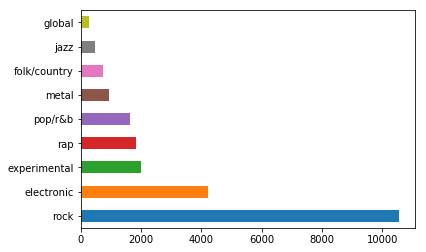

In [11]:
music4.genre.value_counts().plot.barh();

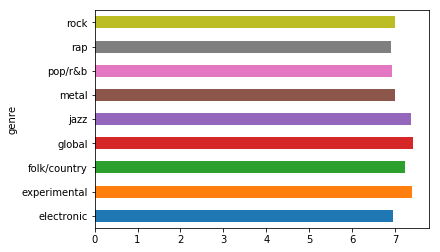

In [12]:
music4.groupby('genre').score.mean().plot.barh();

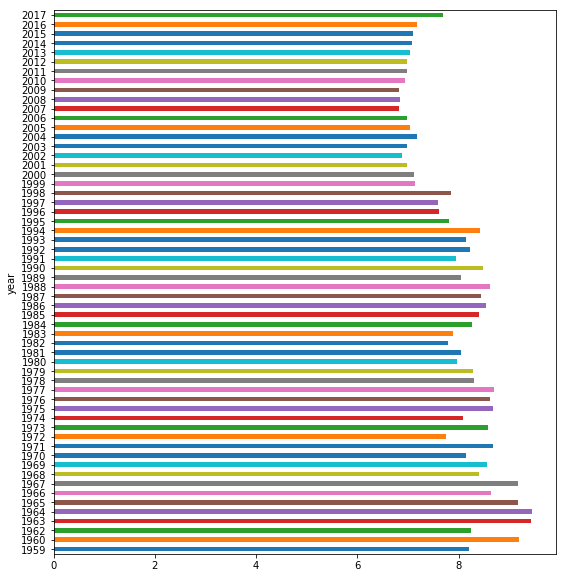

In [13]:
music4.groupby('year').score.mean().plot(kind='barh',figsize=(9,10));

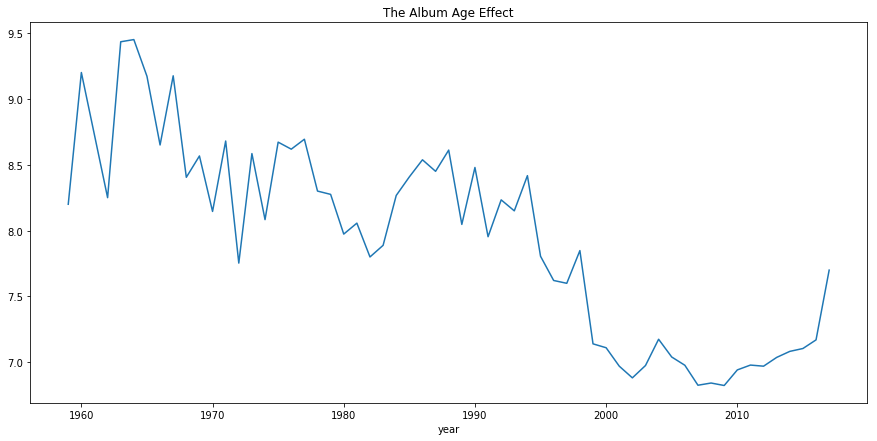

In [14]:
music4.groupby('year').score.mean().plot(kind='line',figsize=(15,7),title='The Album Age Effect');

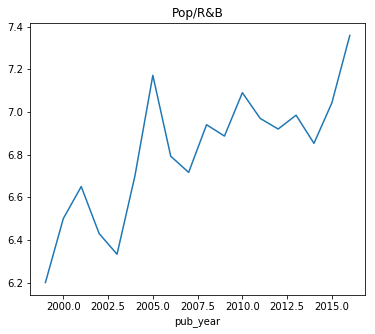

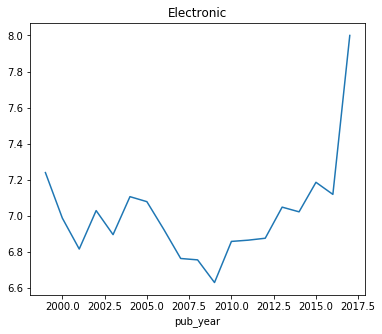

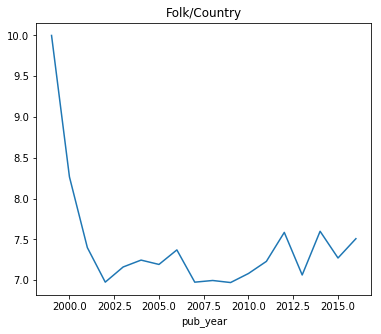

In [15]:
music4[music4.genre=='pop/r&b'].groupby('pub_year').score.mean().plot(kind='line',figsize=(6,5),title='Pop/R&B')
plt.show()
music4[music4.genre=='electronic'].groupby('pub_year').score.mean().plot(kind='line',figsize=(6,5),title='Electronic')
plt.show()
music4[music4.genre=='folk/country'].groupby('pub_year').score.mean().plot(kind='line',figsize=(6,5),title='Folk/Country')
plt.show()

In [16]:
music.head()

,reviewid,label,artist,title,genre,score,pub_year,year
0,21182,warp,!!!,as if,rock,6.9,2015,2015
1,17954,warp,!!!,thr!!!er,rock,6.0,2013,2013
2,14811,warp,!!!,"jamie, my intentions are bass ep",rock,6.8,2010,2010
3,14570,warp,!!!,"strange weather, isn't it?",rock,6.9,2010,2010
4,9956,warp,!!!,myth takes,rock,8.0,2007,2007


# Preparing the Dataset for modeling

In [17]:
genres = pd.get_dummies(music.genre, drop_first=False)

In [18]:
genres.head()

,electronic,experimental,folk/country,global,jazz,metal,pop/r&b,rap,rock
0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,1


In [19]:
music = pd.concat([music, genres], axis=1)

In [20]:
music.head()

,reviewid,label,artist,title,genre,score,pub_year,year,electronic,experimental,folk/country,global,jazz,metal,pop/r&b,rap,rock
0,21182,warp,!!!,as if,rock,6.9,2015,2015,0,0,0,0,0,0,0,0,1
1,17954,warp,!!!,thr!!!er,rock,6.0,2013,2013,0,0,0,0,0,0,0,0,1
2,14811,warp,!!!,"jamie, my intentions are bass ep",rock,6.8,2010,2010,0,0,0,0,0,0,0,0,1
3,14570,warp,!!!,"strange weather, isn't it?",rock,6.9,2010,2010,0,0,0,0,0,0,0,0,1
4,9956,warp,!!!,myth takes,rock,8.0,2007,2007,0,0,0,0,0,0,0,0,1


In [21]:
music.drop(['title', 'genre'], axis=1, inplace=True)

In [22]:
music['score'] = round(music.score)
music.head()

,reviewid,label,artist,score,pub_year,year,electronic,experimental,folk/country,global,jazz,metal,pop/r&b,rap,rock
0,21182,warp,!!!,7.0,2015,2015,0,0,0,0,0,0,0,0,1
1,17954,warp,!!!,6.0,2013,2013,0,0,0,0,0,0,0,0,1
2,14811,warp,!!!,7.0,2010,2010,0,0,0,0,0,0,0,0,1
3,14570,warp,!!!,7.0,2010,2010,0,0,0,0,0,0,0,0,1
4,9956,warp,!!!,8.0,2007,2007,0,0,0,0,0,0,0,0,1


In [23]:
music.isnull().sum()[music.isnull().sum() !=0]

label    12
dtype: int64

In [24]:
music.label.value_counts()

self-released               437
sub pop                     312
domino                      283
thrill jockey               262
merge                       260
drag city                   246
mute                        236
columbia                    230
warp                        226
matador                     209
warner bros.                183
astralwerks                 173
jagjaguwar                  169
interscope                  167
kranky                      157
virgin                      157
capitol                     153
atlantic                    144
rough trade                 138
secretly canadian           133
polyvinyl                   130
4ad                         128
xl                          127
emi                         127
kill rock stars             124
universal                   123
def jam                     119
ninja tune                  111
anti-                       110
hydra head                  110
                           ... 
fdh     

In [25]:
music1 = music.groupby("label").filter(lambda x: len(x) > 20)
music1.label.value_counts()

self-released                     437
sub pop                           312
domino                            283
thrill jockey                     262
merge                             260
drag city                         246
mute                              236
columbia                          230
warp                              226
matador                           209
warner bros.                      183
astralwerks                       173
jagjaguwar                        169
interscope                        167
kranky                            157
virgin                            157
capitol                           153
atlantic                          144
rough trade                       138
secretly canadian                 133
polyvinyl                         130
4ad                               128
emi                               127
xl                                127
kill rock stars                   124
universal                         123
def jam     

In [26]:
music1.shape

(13357, 15)

In [27]:
music.score.mean()

7.039109347442681

In [28]:
music1 = music1.groupby('reviewid').apply(max)

In [29]:
music1.shape

(9739, 15)

In [30]:
music1 = music1.groupby("label").filter(lambda x: len(x) > 20)
music1.label.value_counts()

self-released          363
sub pop                237
merge                  217
drag city              208
warp                   204
domino                 195
thrill jockey          184
matador                174
columbia               154
warner bros.           149
mute                   143
jagjaguwar             135
interscope             129
astralwerks            118
secretly canadian      113
capitol                105
virgin                 104
kranky                 103
4ad                    101
polyvinyl              101
rough trade             98
atlantic                98
xl                      96
def jam                 89
temporary residence     88
universal               87
kill rock stars         84
anti-                   84
rca                     80
fat cat                 78
                      ... 
kemado                  26
definitive jux          26
plug research           26
mush                    26
rune grammofon          25
ba da bing!             25
t

In [31]:
music2 = music1.groupby("label").filter(lambda x: len(x) > 80)
music2.label.describe()

count              3961
unique               28
top       self-released
freq                363
Name: label, dtype: object

In [32]:
labels = pd.get_dummies(music2.label, drop_first=False)

In [33]:
labels.head()

,4ad,anti-,astralwerks,atlantic,capitol,columbia,def jam,domino,drag city,interscope,...,secretly canadian,self-released,sub pop,temporary residence,thrill jockey,universal,virgin,warner bros.,warp,xl
reviewid,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
47,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
50,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
51,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
57,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [34]:
music2 = pd.concat([music2, labels], axis=1)

In [35]:
music2.columns

Index(['reviewid', 'label', 'artist', 'score', 'pub_year', 'year',
       'electronic', 'experimental', 'folk/country', 'global', 'jazz', 'metal',
       'pop/r&b', 'rap', 'rock', '4ad', 'anti-', 'astralwerks', 'atlantic',
       'capitol', 'columbia', 'def jam', 'domino', 'drag city', 'interscope',
       'jagjaguwar', 'kill rock stars', 'kranky', 'matador', 'merge', 'mute',
       'polyvinyl', 'rough trade', 'secretly canadian', 'self-released',
       'sub pop', 'temporary residence', 'thrill jockey', 'universal',
       'virgin', 'warner bros.', 'warp', 'xl'],
      dtype='object')

In [36]:
music2.drop(['reviewid', 'label','artist'], axis=1, inplace=True)

In [37]:
music2.head()

,score,pub_year,year,electronic,experimental,folk/country,global,jazz,metal,pop/r&b,...,secretly canadian,self-released,sub pop,temporary residence,thrill jockey,universal,virgin,warner bros.,warp,xl
reviewid,,,,,,,,,,,,,,,,,,,,,
1,3.0,2004,2004,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
47,8.0,2002,2002,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
50,7.0,2002,2002,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
51,6.0,2000,2000,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
57,6.0,2005,2005,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [38]:
music2.score.value_counts(normalize=True)

8.0     0.329210
7.0     0.285534
6.0     0.183792
9.0     0.070184
5.0     0.058066
4.0     0.033577
10.0    0.015905
3.0     0.012876
2.0     0.008331
1.0     0.001515
0.0     0.001010
Name: score, dtype: float64

In [39]:
music2.head()

,score,pub_year,year,electronic,experimental,folk/country,global,jazz,metal,pop/r&b,...,secretly canadian,self-released,sub pop,temporary residence,thrill jockey,universal,virgin,warner bros.,warp,xl
reviewid,,,,,,,,,,,,,,,,,,,,,
1,3.0,2004,2004,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
47,8.0,2002,2002,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
50,7.0,2002,2002,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
51,6.0,2000,2000,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
57,6.0,2005,2005,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [40]:
def func(row):
    if row['score'] >8:
        return 'Criticaly Acclaimed'
    elif row['score'] >6:
        return 'Good Album' 
    else:
        return 'Bad Album'

music2['rating'] = music2.apply(func, axis=1)

In [41]:
music2.rating.value_counts(normalize=True)

Good Album             0.614744
Bad Album              0.299167
Criticaly Acclaimed    0.086089
Name: rating, dtype: float64

In [42]:
music2.head()

,score,pub_year,year,electronic,experimental,folk/country,global,jazz,metal,pop/r&b,...,self-released,sub pop,temporary residence,thrill jockey,universal,virgin,warner bros.,warp,xl,rating
reviewid,,,,,,,,,,,,,,,,,,,,,
1,3.0,2004,2004,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Bad Album
47,8.0,2002,2002,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Good Album
50,7.0,2002,2002,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Good Album
51,6.0,2000,2000,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Bad Album
57,6.0,2005,2005,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,Bad Album


In [43]:
music2.columns

Index(['score', 'pub_year', 'year', 'electronic', 'experimental',
       'folk/country', 'global', 'jazz', 'metal', 'pop/r&b', 'rap', 'rock',
       '4ad', 'anti-', 'astralwerks', 'atlantic', 'capitol', 'columbia',
       'def jam', 'domino', 'drag city', 'interscope', 'jagjaguwar',
       'kill rock stars', 'kranky', 'matador', 'merge', 'mute', 'polyvinyl',
       'rough trade', 'secretly canadian', 'self-released', 'sub pop',
       'temporary residence', 'thrill jockey', 'universal', 'virgin',
       'warner bros.', 'warp', 'xl', 'rating'],
      dtype='object')

# Logistic Regression

In [44]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

feature_cols = ['pub_year', 'year', 'electronic', 'experimental', 'folk/country',
       'global', 'jazz', 'metal', 'pop/r&b', 'rap', 'rock', '4ad', 'anti-',
       'astralwerks', 'atlantic', 'capitol', 'columbia', 'def jam', 'domino',
       'drag city', 'interscope', 'jagjaguwar', 'kill rock stars', 'kranky',
       'matador', 'merge', 'mute', 'polyvinyl', 'rough trade',
       'secretly canadian', 'self-released', 'sub pop', 'temporary residence',
       'thrill jockey', 'universal', 'virgin', 'warner bros.', 'warp', 'xl']
X = music2[feature_cols]
y = music2.rating

logreg.fit(X,y)
pred = logreg.predict(X)

In [45]:
logreg.predict_proba(X)[0:10]

array([[0.32276754, 0.05353764, 0.62369482],
       [0.4594452 , 0.04117305, 0.49938175],
       [0.25625966, 0.05021055, 0.69352979],
       [0.25644848, 0.05030245, 0.69324907],
       [0.26013684, 0.03523116, 0.70463201],
       [0.26013684, 0.03523116, 0.70463201],
       [0.23075195, 0.12641167, 0.64283638],
       [0.2305977 , 0.12621391, 0.6431884 ],
       [0.45839476, 0.03614637, 0.50545887],
       [0.45808771, 0.03604679, 0.5058655 ]])

In [46]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
X = music2[['pub_year', 'year', 'electronic', 'experimental', 'folk/country',
       'global', 'jazz', 'metal', 'pop/r&b', 'rap', 'rock', '4ad', 'anti-',
       'astralwerks', 'atlantic', 'capitol', 'columbia', 'def jam', 'domino',
       'drag city', 'interscope', 'jagjaguwar', 'kill rock stars', 'kranky',
       'matador', 'merge', 'mute', 'polyvinyl', 'rough trade',
       'secretly canadian', 'self-released', 'sub pop', 'temporary residence',
       'thrill jockey', 'universal', 'virgin', 'warner bros.', 'warp', 'xl']]
y = music2.rating

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y)

LR.fit(X_train,y_train)

y_pred = LR.predict(X_test)

LR.score(X_test, y_test)

0.6337033299697276

In [47]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
X = music2[['pub_year', 'year', 'electronic', 'experimental', 'folk/country',
       'global', 'jazz', 'metal', 'pop/r&b', 'rap', 'rock']]
y = music2.rating

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y)

LR.fit(X_train,y_train)

y_pred = LR.predict(X_test)

LR.score(X_test, y_test)

0.6256306760847629

In [49]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
X = music1[['pub_year', 'year']]
y = music1.rating

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y)

LR.fit(X_train,y_train)

y_pred = LR.predict(X_test)

LR.score(X_test, y_test)

0.6522530723714156

In [50]:
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
X = music2[['pub_year', 'year', 'electronic', 'experimental', 'folk/country',
       'global', 'jazz', 'metal', 'pop/r&b', 'rap', 'rock', '4ad', 'anti-',
       'astralwerks', 'atlantic', 'capitol', 'columbia', 'def jam', 'domino',
       'drag city', 'interscope', 'jagjaguwar', 'kill rock stars', 'kranky',
       'matador', 'merge', 'mute', 'polyvinyl', 'rough trade',
       'secretly canadian', 'self-released', 'sub pop', 'temporary residence',
       'thrill jockey', 'universal', 'virgin', 'warner bros.', 'warp', 'xl']]
y = music2.rating

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y)

LR.fit(X_train,y_train)

y_pred = LR.predict(X_test)

LR.score(X_test, y_test)
confusion_matrix(y_test, y_pred, labels=["Criticaly Acclaimed","Good Album", "Bad Album"])

array([[  6,  74,   7],
       [  2, 571,  38],
       [  0, 253,  40]])

In [51]:
from sklearn.metrics import classification_report
print(classification_report(y_test, LR.predict(X_test)))

                     precision    recall  f1-score   support

          Bad Album       0.47      0.14      0.21       293
Criticaly Acclaimed       0.75      0.07      0.13        87
         Good Album       0.64      0.93      0.76       611

        avg / total       0.60      0.62      0.54       991



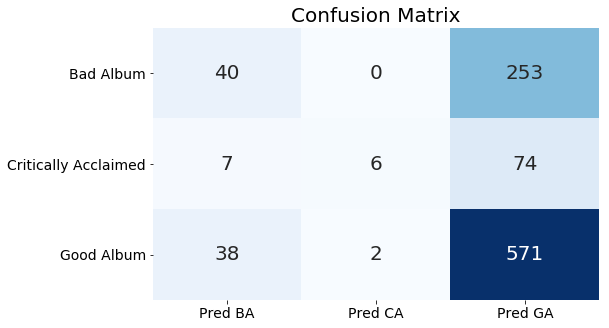

In [52]:
from sklearn.metrics import classification_report
import seaborn as sns
conmat = np.array(confusion_matrix(y_test, LR.predict(X_test)))
confusion = pd.DataFrame(conmat, index=['Bad Album', 'Critically Acclaimed', 'Good Album'],\
                     columns=['Pred BA', 'Pred CA', 'Pred GA'])

plt.figure(figsize=(8,5))
heat = sns.heatmap(confusion, annot=True, annot_kws={"size": 20}, 
                   cmap='Blues', fmt='g', cbar=False)
plt.xticks(rotation=0, fontsize=14)
plt.yticks(fontsize=14)
plt.title("Confusion Matrix", fontsize=20)
plt.yticks(rotation=0);

# Random Forest

In [53]:
music12 = music2
factor = pd.factorize(music12['rating'])
music12.rating = factor[0]
definitions = factor[1]
print(music12.rating.head())
print(definitions)

reviewid
1     0
47    1
50    1
51    0
57    0
Name: rating, dtype: int64
Index(['Bad Album', 'Good Album', 'Criticaly Acclaimed'], dtype='object')


In [54]:
X = music12.iloc[:,1:3].values
y = music12.rating.values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 8)

In [56]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators = 4, criterion = 'gini', random_state = 33)
RF.fit(X_train, y_train)
RF.score(X_test, y_test)

0.6175580221997982

In [57]:
print(classification_report(y_test, RF.predict(X_test)))

             precision    recall  f1-score   support

          0       0.34      0.04      0.07       286
          1       0.63      0.97      0.76       617
          2       1.00      0.01      0.02        88

avg / total       0.58      0.62      0.50       991



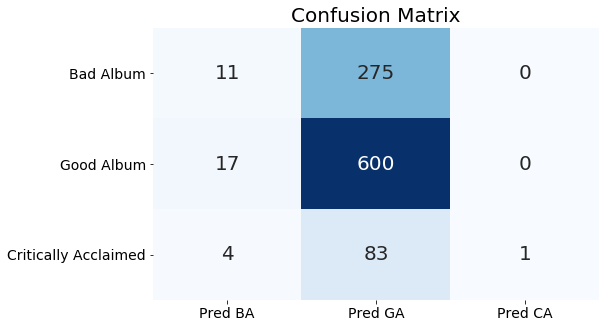

In [58]:
conmat = np.array(confusion_matrix(y_test, RF.predict(X_test)))
confusion = pd.DataFrame(conmat, index=['Bad Album', 'Good Album','Critically Acclaimed'],\
                     columns=['Pred BA', 'Pred GA', 'Pred CA'])

plt.figure(figsize=(8,5))
heat = sns.heatmap(confusion, annot=True, annot_kws={"size": 20}, 
                   cmap='Blues', fmt='g', cbar=False)
plt.xticks(rotation=0, fontsize=14)
plt.yticks(fontsize=14)
plt.title("Confusion Matrix", fontsize=20)
plt.yticks(rotation=0);

In [59]:
from sklearn.model_selection import GridSearchCV

print('Processing GridSearch. Please hold for the next available set of outputs.\n')
parameters = {"max_depth": [2,3,4,5,6,7,8,9,10,11,12]
             ,"min_samples_split" :[2,3,4,5,6]
             ,"n_estimators" : [2,3,4,5,6,7,8,9]
             ,"min_samples_leaf": [1,2,3,4,5]
             ,"criterion": ('gini','entropy')}

rf = RandomForestClassifier(random_state=33)
gd_model = GridSearchCV(rf, parameters, n_jobs = -1, cv=10)
gd_model.fit(X,y)

print(gd_model.best_params_)
print(gd_model.best_score_)

Processing GridSearch. Please hold for the next available set of outputs.

{'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 3}
0.6147437515778844


# Support Vector Machine Classifier 

In [297]:
from sklearn.svm import SVC
X = music2[['pub_year', 'year', 'electronic', 'experimental', 'folk/country',
       'global', 'jazz', 'metal', 'pop/r&b', 'rap', 'rock', '4ad', 'anti-',
       'astralwerks', 'atlantic', 'capitol', 'columbia', 'def jam', 'domino',
       'drag city', 'interscope', 'jagjaguwar', 'kill rock stars', 'kranky',
       'matador', 'merge', 'mute', 'polyvinyl', 'rough trade',
       'secretly canadian', 'self-released', 'sub pop', 'temporary residence',
       'thrill jockey', 'universal', 'virgin', 'warner bros.', 'warp', 'xl']]
y = music2.rating
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 9)
svm_model = SVC(kernel = 'rbf', C = 10).fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)
svm_model.score(X_test, y_test)

0.6316851664984864

C: a parameter that determines how you control your thresh-holds and whether you wanna minimise your false positives or negatives and control the error margin or detect outliers 

kernel: it determines what type of function will be your dicision function depending on your problem and what kind of relations did you conclude on your EDA

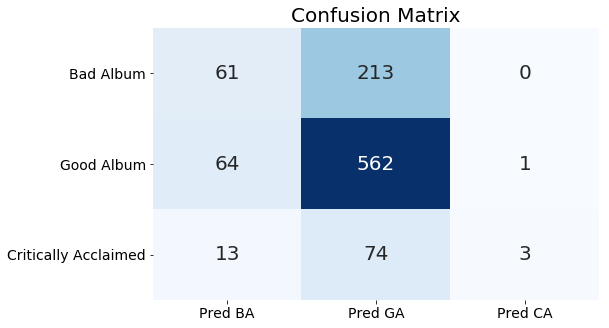

In [110]:
conmat = np.array(confusion_matrix(y_test, svm_model.predict(X_test)))
confusion = pd.DataFrame(conmat, index=['Bad Album', 'Good Album','Critically Acclaimed'],\
                     columns=['Pred BA', 'Pred GA', 'Pred CA'])

plt.figure(figsize=(8,5))
heat = sns.heatmap(confusion, annot=True, annot_kws={"size": 20}, 
                   cmap='Blues', fmt='g', cbar=False)
plt.xticks(rotation=0, fontsize=14)
plt.yticks(fontsize=14)
plt.title("Confusion Matrix", fontsize=20)
plt.yticks(rotation=0);

In [111]:
print(classification_report(y_test, svm_model.predict(X_test)))

             precision    recall  f1-score   support

          0       0.44      0.22      0.30       274
          1       0.66      0.90      0.76       627
          2       0.75      0.03      0.06        90

avg / total       0.61      0.63      0.57       991



# Bernoulli Naive Bayes

In [331]:
from sklearn.naive_bayes import BernoulliNB
X = music2[['pub_year', 'year', 'electronic', 'experimental', 'folk/country',
       'global', 'jazz', 'metal', 'pop/r&b', 'rap', 'rock', '4ad', 'anti-',
       'astralwerks', 'atlantic', 'capitol', 'columbia', 'def jam', 'domino',
       'drag city', 'interscope', 'jagjaguwar', 'kill rock stars', 'kranky',
       'matador', 'merge', 'mute', 'polyvinyl', 'rough trade',
       'secretly canadian', 'self-released', 'sub pop', 'temporary residence',
       'thrill jockey', 'universal', 'virgin', 'warner bros.', 'warp', 'xl']]
y = music2.rating
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 3)
bnb = BernoulliNB().fit(X, y)
bnb_predict = bnb.predict(X_test)
bnb.score(X_test, y_test)

0.6417759838546923

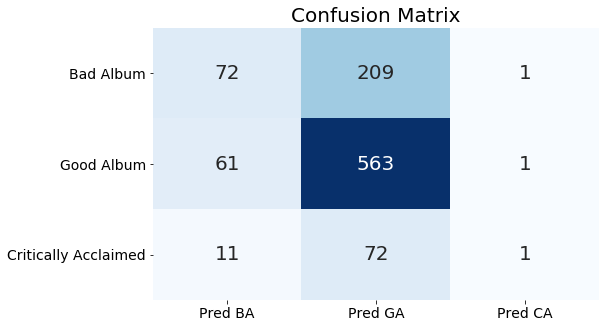

In [332]:
conmat = np.array(confusion_matrix(y_test, bnb.predict(X_test)))
confusion = pd.DataFrame(conmat, index=['Bad Album', 'Good Album','Critically Acclaimed'],\
                     columns=['Pred BA', 'Pred GA', 'Pred CA'])

plt.figure(figsize=(8,5))
heat = sns.heatmap(confusion, annot=True, annot_kws={"size": 20}, 
                   cmap='Blues', fmt='g', cbar=False)
plt.xticks(rotation=0, fontsize=14)
plt.yticks(fontsize=14)
plt.title("Confusion Matrix", fontsize=20)
plt.yticks(rotation=0);

In [333]:
print(classification_report(y_test, bnb.predict(X_test)))

             precision    recall  f1-score   support

          0       0.50      0.26      0.34       282
          1       0.67      0.90      0.77       625
          2       0.33      0.01      0.02        84

avg / total       0.59      0.64      0.58       991



# Multinomial Naive Bayes

In [373]:
from sklearn.naive_bayes import MultinomialNB
X = music2[['pub_year', 'year', 'electronic', 'experimental', 'folk/country',
       'global', 'jazz', 'metal', 'pop/r&b', 'rap', 'rock', '4ad', 'anti-',
       'astralwerks', 'atlantic', 'capitol', 'columbia', 'def jam', 'domino',
       'drag city', 'interscope', 'jagjaguwar', 'kill rock stars', 'kranky',
       'matador', 'merge', 'mute', 'polyvinyl', 'rough trade',
       'secretly canadian', 'self-released', 'sub pop', 'temporary residence',
       'thrill jockey', 'universal', 'virgin', 'warner bros.', 'warp', 'xl']]
y = music2.rating
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 29)
mnb = MultinomialNB().fit(X, y)
mnb_predict = mnb.predict(X_test)
mnb.score(X_test, y_test)

0.656912209889001

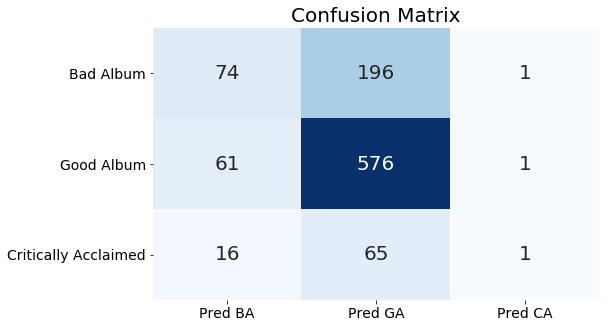

In [374]:
conmat = np.array(confusion_matrix(y_test, mnb.predict(X_test)))
confusion = pd.DataFrame(conmat, index=['Bad Album', 'Good Album','Critically Acclaimed'],\
                     columns=['Pred BA', 'Pred GA', 'Pred CA'])

plt.figure(figsize=(8,5))
heat = sns.heatmap(confusion, annot=True, annot_kws={"size": 20}, 
                   cmap='Blues', fmt='g', cbar=False)
plt.xticks(rotation=0, fontsize=14)
plt.yticks(fontsize=14)
plt.title("Confusion Matrix", fontsize=20)
plt.yticks(rotation=0);

In [375]:
print(classification_report(y_test, mnb.predict(X_test)))

             precision    recall  f1-score   support

          0       0.49      0.27      0.35       271
          1       0.69      0.90      0.78       638
          2       0.33      0.01      0.02        82

avg / total       0.60      0.66      0.60       991

